# 7.4 합성곱 신경망과 숫자 이미지 인식

## 7.4.1 MNIST 데이터셋

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np

data = pd.read_csv('./sample_data/mnist_train_small.csv', header=None)
data = np.array(data)

In [ ]:
print(data)
print(data.shape)

# 20000x785 크기의 배열
# 0번째 열은 정답정보 (해당 데이터가 어느 숫자인지 0~9사이),
# 1번째열부터 마지막열까지 이미지 데이터 28x28 이미지의 픽셀정보가 1차원상에 배열(784)

[[6 0 0 ... 0 0 0]
 [5 0 0 ... 0 0 0]
 [7 0 0 ... 0 0 0]
 ...
 [2 0 0 ... 0 0 0]
 [9 0 0 ... 0 0 0]
 [5 0 0 ... 0 0 0]]
(20000, 785)


In [ ]:
# 1차원의 배경 안에 0부터 255의 값이 들어있음
print(data[0,:])

[  6   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  24  67  67
  18   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0 131 252 252  66   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 159 250
 232  30  32   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0  15 222 252 108   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 147
 252 183   5   0   0   0   0   0   0   0  20  89  8

In [ ]:
# 1번째 열부터 x train
x_train = data[:, 1:]

# 0번째 열은 y train
y_train = data[:,0]

# 길이 784인 1차원 배열을 28x28인 2차원 배열로 변환
x_train = x_train.reshape(-1, 28, 28)              # -1은 뒤에 숫자에 따라 가변적으로 정해짐

In [ ]:
# 바뀐 배열의 모양 출력
x_train.shape

# 현재 3차원 (20000x28x28)

(20000, 28, 28)

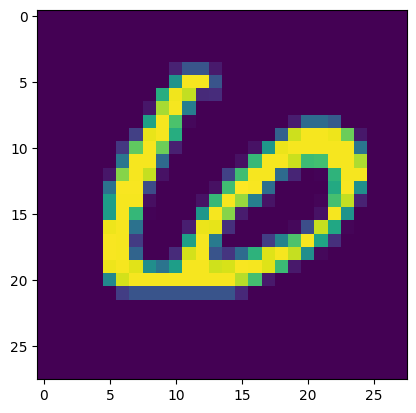

In [ ]:
import matplotlib.pyplot as plt

# MNIST 데이터셋의 첫 번째 데이터를 이미지로 보여주기
plt.imshow(x_train[0,:,:])

## 7.4.2 딥러닝 모델 생성과 학습

In [ ]:
# 손글씨 이미지 학습 - 합성곱 신경망의 모델 생성위해 필요한 라이브러리 설치
import tensorflow.keras as keras
from keras.models import Sequential
from keras import layers
from keras import optimizers

In [ ]:
# 3차원 데이터를 4차원으로 수정 (20000 x 28 x28 x1)
x_train = np.expand_dims(x_train,-1)

# 타깃정보 one-hot-encoding
y_train = keras.utils.to_categorical(y_train)

In [ ]:
# 손글씨를 인식하기 위한 네트워크 구조
model = Sequential()
model.add(layers.Conv2D(filters=8, kernel_size=3, input_shape=(28,28,1), activation='relu'))
model.add(layers.Conv2D(filters=16, kernel_size=3, activation='relu'))
model.add(layers.MaxPooling2D(strides=2, padding='same'))
model.add(layers.Flatten())
model.add(layers.Dense(units=10, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer=optimizers.RMSprop(learning_rate=0.001), metrics=['accuracy'])

'''
합성곱층 기술법
Conv2D : 이미지를 위한 2차원 합성곱층
MaxPooling층 : MaxPooling2D
Flatten층 : Flatten 2D-> 1D
Dense층: 은닉층

Conv2D 파라미터
filters : 합성곱에 사용할 필터의 개수
kernel_size : 필터의 너비/높이
input_shape : 입력데이터의 모양(크기), 마지막 인자 흑백이면 1 컬러면 3
activation : 활성화함수 종류

MaxPooling 파라미터
pool_size : 풀의 크기
strides : 풀이 한번에 이동하는 크기
* 완전 연결층을 추가하고 모델을 컴파일하는 과정은 완전 연결 신경망을 구성할 때와 동일

'''

'\n합성곱층 기술법\nConv2D : 이미지를 위한 2차원 합성곱층\nMaxPooling층 : MaxPooling2D\nFlatten층 : Flatten\n\n\nConv2D 파라미터\nfilters : 합성곱에 사용할 필터의 개수\nkernel_size : 필터의 너비/높이\ninput_shape : 입력데이터의 모양(크기)\nactivation : 활성화함수 종류\n\nMaxPooling 파라미터\npool_size : 풀의 크기\nstrides : 풀이 한번에 이동하는 크기\n* 완전 연결층을 추가하고 모델을 컴파일하는 과정은 완전 연결 신경망을 구성할 때와 동일\n\n'

In [ ]:
# 구성된 모델 사용하여 학습 진행
model.fit(x_train, y_train, epochs=10, batch_size=64, validation_split=0.3)

Epoch 1/10
219/219 [==============================] - 10s 42ms/step - loss: 1.6361 - accuracy: 0.8403 - val_loss: 0.2673 - val_accuracy: 0.9367
Epoch 2/10
219/219 [==============================] - 7s 32ms/step - loss: 0.1501 - accuracy: 0.9591 - val_loss: 0.1616 - val_accuracy: 0.9548
Epoch 3/10
219/219 [==============================] - 9s 41ms/step - loss: 0.0642 - accuracy: 0.9804 - val_loss: 0.1480 - val_accuracy: 0.9617
Epoch 4/10
219/219 [==============================] - 7s 32ms/step - loss: 0.0335 - accuracy: 0.9891 - val_loss: 0.1141 - val_accuracy: 0.9697
Epoch 5/10
219/219 [==============================] - 10s 44ms/step - loss: 0.0194 - accuracy: 0.9933 - val_loss: 0.1123 - val_accuracy: 0.9725
Epoch 6/10
219/219 [==============================] - 7s 32ms/step - loss: 0.0092 - accuracy: 0.9972 - val_loss: 0.1263 - val_accuracy: 0.9762
Epoch 7/10
219/219 [==============================] - 9s 41ms/step - loss: 0.0062 - accuracy: 0.9977 - val_loss: 0.1453 - val_accuracy: 0.97

## 7.4.3 테스트

In [ ]:
data = pd.read_csv('./sample_data/mnist_test.csv', header=None)
data = np.array(data)

In [ ]:
x_test = data[:, 1:]
y_test = data[:,0]
x_test = x_test.reshape(-1,28,28,1)

In [ ]:
o = model.predict(x_test)
o = np.argmax(o,-1)

313/313 [==============================] - 2s 6ms/step


In [ ]:
sum(y_test == o)/len(y_test)

0.9702

## 7.4.4 결과 분석
